## Classifying Newswires - _Multiclass Classification Problem_

In [142]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Preparing the data

In [143]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# -- one_hot_encoding by hand
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.0
#     return results
#
# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

# Keras built in for the same thing
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# another way to handle the labels is to cast to an integer tensor
# for this style of label, you need to use a different loss function, see below
y_train_tensor = np.array(train_labels)
y_test_tensor = np.array(test_labels)

Looking at the different formats of the test_labels, y_test, and y_test_tensor

In [144]:
test_labels[0: 5]

array([ 3, 10,  1,  4,  4])

In [145]:
y_test[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [146]:
y_test_tensor[0:5]

array([ 3, 10,  1,  4,  4])

Building the model
- compared to the binary classification problem, we need bigger layers
- we have 46 categories/outcomes, so rather than 16 node layers, we'll go with bigger internal layers

In [147]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# if using the integer tensor approach, use "sparse_categorical_crossentropy" for loss
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Validating the approach

In [148]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.8684 - accuracy: 0.4924 - val_loss: 1.9383 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.5986 - accuracy: 0.6714 - val_loss: 1.4145 - val_accuracy: 0.6800
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.2099 - accuracy: 0.7388 - val_loss: 1.2063 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 0.9765 - accuracy: 0.7925 - val_loss: 1.0854 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8076 - accuracy: 0.8299 - val_loss: 1.0188 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6706 - accuracy: 0.8563 - val_loss: 0.9453 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5669 - accuracy: 0.8809 - val_loss: 0.9194 - val_accuracy: 0.8170
Epoch 8/20
16

In [149]:
import matplotlib.pyplot as plt

history_dict = history.history
epochs = range(1,21)
training_loss = history_dict["loss"]
validation_loss = history_dict["val_loss"]
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]


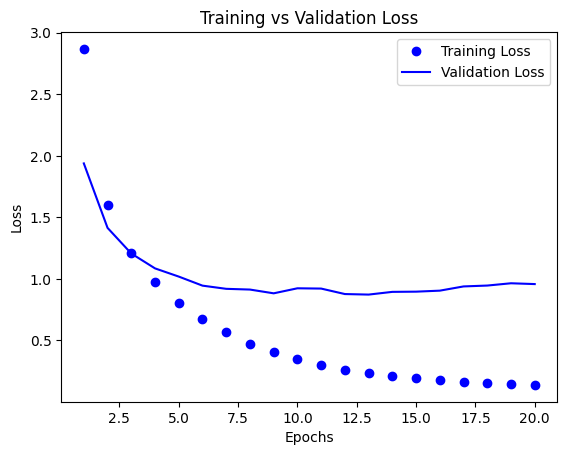

In [150]:
plt.plot(epochs, training_loss, "bo", label='Training Loss')
plt.plot(epochs, validation_loss, "b", label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

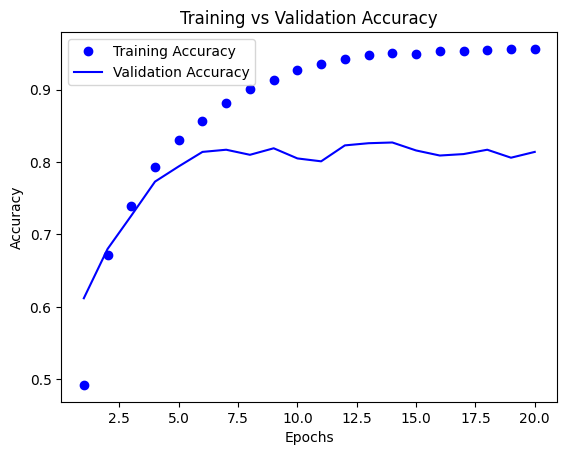

In [151]:
plt.clf()
plt.plot(epochs, training_acc, "bo", label='Training Accuracy')
plt.plot(epochs, validation_acc, "b", label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model begins to overfit around nine epochs. Retraining and testing new model.

In [152]:
model_v2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model_v2.compile(optimizer="rmsprop",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

model_v2.fit(x_train,
            y_train,
            epochs=9,
            batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 26ms/step - loss: 2.6668 - accuracy: 0.5126
Epoch 2/9
18/18 [==============================] - 0s 24ms/step - loss: 1.5262 - accuracy: 0.6782
Epoch 3/9
18/18 [==============================] - 0s 25ms/step - loss: 1.1733 - accuracy: 0.7487
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.9499 - accuracy: 0.7988
Epoch 5/9
18/18 [==============================] - 0s 24ms/step - loss: 0.7848 - accuracy: 0.8344
Epoch 6/9
18/18 [==============================] - 0s 25ms/step - loss: 0.6529 - accuracy: 0.8612
Epoch 7/9
18/18 [==============================] - 0s 25ms/step - loss: 0.5427 - accuracy: 0.8880
Epoch 8/9
18/18 [==============================] - 0s 26ms/step - loss: 0.4580 - accuracy: 0.9022
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.7885


In [153]:
results

[1.0426658391952515, 0.7885128855705261]

Generating predictions on new data

In [154]:
predictions = model_v2.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [155]:
np.sum(predictions[0]) # all prediction probabilities sum to 1

0.9999998

In [165]:
prediction_values = [np.argmax(pred) for pred in predictions]
matched_values = [1 for pred_value, test_value in zip(prediction_values, test_labels) if pred_value == test_value]
match_percentage = len(matched_values) / len(test_labels)

match_percentage

0.7938557435440784